<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/105/load_keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
!unzip -qq loading-model-keras.zip
%cd loading-model-keras
!wget https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
!unzip -qq animals.zip

--2023-02-22 12:36:13--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/loading-model-keras/loading-model-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.161.170, 52.92.227.178, 3.5.81.171, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.161.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380090 (371K) [binary/octet-stream]
Saving to: ‘loading-model-keras.zip’

loading-model-keras 100%[===================>] 371.18K  1.08MB/s    in 0.3s    

2023-02-22 12:36:14 (1.08 MB/s) - ‘loading-model-keras.zip’ saved [380090/380090]

/content/loading-model-keras
--2023-02-22 12:36:14--  https://pis-datasets.s3.us-east-2.amazonaws.com/animals.zip
Resolving pis-datasets.s3.us-east-2.amazonaws.com (pis-datasets.s3.us-east-2.amazonaws.com)... 52.219.97.178
Connecting to pis

In [2]:
from imutils import paths
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

from pyimagesearch.preprocessing import ImageToArrayPreprocessor, SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
args = {
    "dataset": "animals",
    "model": "shallownet_weights.hdf5"
}

In [5]:
# init class labels
class_labels = ["cat", "dog", "panda"]

# grab list of images and sample randomly
print("[INFO] sampling images...")
image_paths = np.array(list(paths.list_images(args["dataset"])))
idxs = np.random.randint(0, len(image_paths), size=(10,))
image_paths = image_paths[idxs]

[INFO] sampling images...


In [6]:
# init image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load dataset and scale pixel intensities to [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(image_paths)
data = data.astype("float") / 255.0

In [7]:
# load pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model(args["model"])

[INFO] loading pre-trained network...


In [8]:
# make predictions on images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)

[INFO] predicting...
1/1 [==============================] - 0s 439ms/step


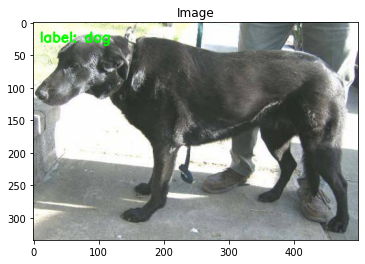

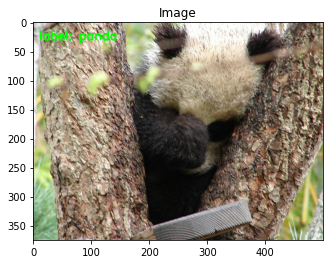

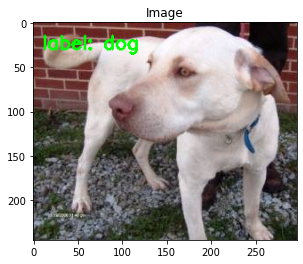

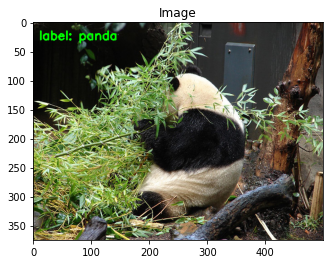

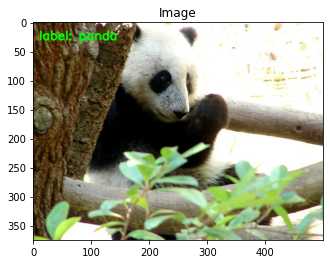

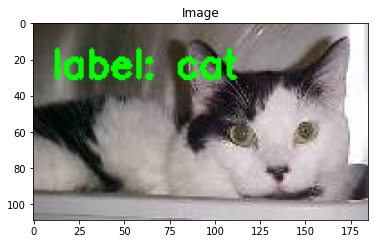

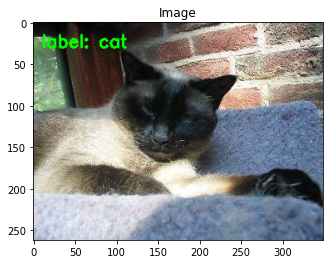

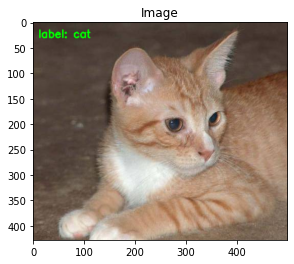

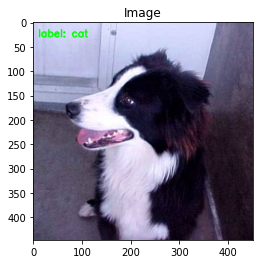

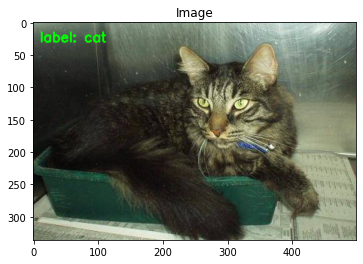

In [9]:
# loop over images
for (i, image_path) in enumerate(image_paths):
    # load image
    image = cv2.imread(image_path)
    # draw prediction
    cv2.putText(
        image, 
        text=f"label: {class_labels[preds[i]]}",
        org=(10, 30),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.7,
        color=(0, 255, 0),
        thickness=2, 
    )
    # show image
    plt_imshow("Image", image)